In [1]:
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139064 sha256=0ea0ec024955068b8fdb9cb2a1f3074f6a805e0896d1228850c7ef55be22a1c1
  Stored in directory: c:\users\shash\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [188]:
# Importing required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [189]:
# Fetch historical stock data for Apple (AAPL)
apple = yf.Ticker("AAPL")
hist_data = apple.history(period="max")

In [190]:
# Extracting relevant data for modeling
Y_data = hist_data["Close"]  # Target variable: Closing price
X_data = hist_data[['Open', 'High', 'Low', 'Volume']]  # Features

Text(0.5, 1.0, 'stock_data')

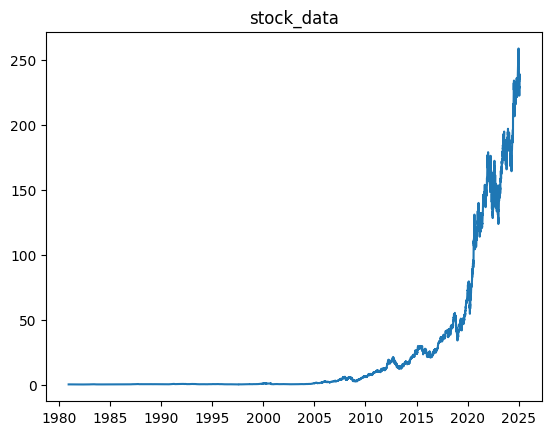

In [191]:
plt.plot(Y_data)
plt.title("stock_data")

In [192]:
hist_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [193]:
hist_data.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999947,0.999943,0.999882,-0.266473,0.092723,0.005163
High,0.999947,1.000000,0.999929,0.999946,-0.266179,0.092421,0.005345
Low,0.999943,0.999929,1.000000,0.999947,-0.266936,0.092680,0.005136
Close,0.999882,0.999946,0.999947,1.000000,-0.266564,0.092588,0.005311
Volume,-0.266473,-0.266179,-0.266936,-0.266564,1.000000,-0.035765,0.002026
Dividends,0.092723,0.092421,0.092680,0.092588,-0.035765,1.000000,-0.001192
Stock Splits,0.005163,0.005345,0.005136,0.005311,0.002026,-0.001192,1.000000


In [194]:
# Splitting data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(X_data, Y_data, test_size=0.4, random_state=2)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=2)


In [195]:
# Standardizing the feature values
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Variables for tracking results
degrees = range(1, 11)
cv_scores = []
poly_transformers = []
models = []

# Loop through polynomial degrees and evaluate models
for degree in degrees:
    # Apply Polynomial Features transformation
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly_train = poly.fit_transform(x_train_scaled)
    x_poly_cv = poly.transform(x_cv_scaled)
    
    # Save the transformer for future use
    poly_transformers.append(poly)
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    models.append(model)
    
    # Cross-validation to evaluate model performance
    cv_score = -cross_val_score(model, x_poly_cv, y_cv, cv=3, scoring="neg_mean_squared_error").mean()
    cv_scores.append(cv_score)

In [ ]:
plt.plot(degrees , cv_scores, marker = "o")
plt.xlabel("Polynomal Degrees")
plt.ylabel("MSE")
plt.title("Degree VS MSE")
plt.show()


In [164]:
np.argmin(cv_scores)

np.int64(0)

In [ ]:
best_model_idx = np.argmin(cv_scores)
best_degree = degrees[best_model_idx]

In [ ]:
# Apply the best model's polynomial transformation to the test data
x_poly_test = poly_transformers[best_model_idx].transform(x_test_scaled)
y_pred = models[best_model_idx].predict(x_poly_test)


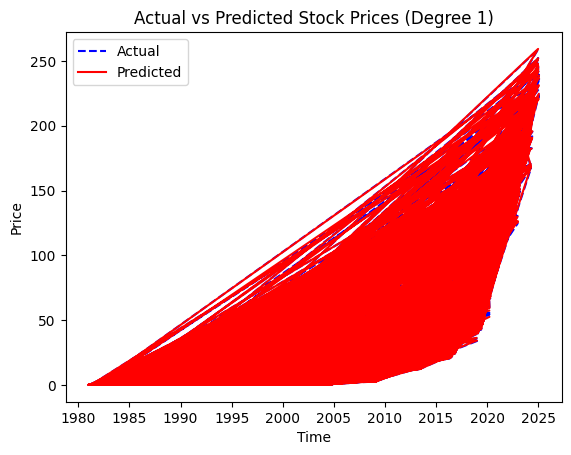

In [181]:
plt.plot(y_test.index, y_test.values, label="Actual",linestyle='--', color = "blue")
plt.plot(y_test.index , y_hat, label="Predicted", color = "red")
plt.legend()
plt.title(f"Actual vs Predicted Stock Prices (Degree {degrees[best_model]})")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [ ]:
y_hat = models[best_model].predict(x_poly_test)